# Classification_sex

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import scikitplot
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns


In [46]:
df = pd.read_pickle("./dataunderstanding.pkl")
df['sex'] = df['sex'].map({0: 'M', 1: 'F'})
df.head()

,vocal_channel,emotion,emotional_intensity,repetition,sex,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,angry,calm,disgust,fearful,happy,neutral,sad,surprised
0,0,fearful,0,2,F,3737,-36.793432,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,0,angry,0,1,F,3904,-37.443235,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,1,happy,1,2,F,4671,-32.290737,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,0,surprised,0,1,F,3637,-49.019839,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,1,happy,1,2,F,4404,-31.214503,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


## Our target

In [47]:
target = 'sex'

## Normalizing the dataset

In [48]:
#Dropping columns not useful for analisys
dfnaf = df.drop(['sex','emotion', 'angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], axis =1)
dfnaf

,vocal_channel,emotional_intensity,repetition,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_std,mfcc_min,mfcc_max,...,sc_std,sc_min,sc_max,sc_kur,sc_skew,stft_kur,stft_skew,max,kur,skew
0,0,0,2,3737,-36.793432,16995,-33.485947,134.654860,-755.22345,171.69092,...,3328.055457,0.000000,12088.958033,-1.120769,0.250940,-1.215025,0.403514,0.138947,9.406061,0.273153
1,0,0,1,3904,-37.443235,13906,-29.502108,130.485630,-713.98560,205.00770,...,4040.931570,0.000000,12000.290443,-1.531204,0.219582,-1.384174,0.290905,0.263062,19.564187,0.292157
2,1,1,2,4671,-32.290737,18723,-30.532463,126.577110,-726.06036,165.45653,...,3332.131300,0.000000,12007.751173,-1.130153,0.436699,-1.242947,0.470350,0.166351,4.881241,0.302659
3,0,0,1,3637,-49.019839,11617,-36.059555,159.725160,-842.94635,190.03609,...,4053.663073,0.000000,12048.223893,-1.497765,0.098802,-1.445318,0.274756,0.024078,13.040259,-0.081014
4,1,1,2,4404,-31.214503,15137,-31.405996,122.125824,-700.70276,161.13400,...,3442.724109,0.000000,12025.582707,-1.167544,0.496066,-1.366742,0.318926,0.242676,7.485109,0.414872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,1,1,4605,-42.136827,9871,-30.225578,158.845500,-855.92420,208.18497,...,4114.260257,0.000000,12210.517144,-1.588861,0.184390,-1.075888,-0.310088,0.052399,9.551363,0.759247
2448,0,0,1,4171,-43.342901,8963,-31.160332,157.499700,-825.37410,220.79490,...,4191.727090,0.000000,12064.561791,-1.614582,-0.113920,-1.026071,-0.408018,0.084045,22.517991,1.073633
2449,1,1,2,5239,-37.919308,9765,-26.135280,138.133210,-768.36536,235.53938,...,4231.511986,0.000000,12207.179884,-1.337419,0.619346,-1.473789,0.130310,0.097260,4.964319,-0.005821
2450,0,0,1,3737,-45.751265,9716,-28.242815,159.943400,-868.09576,219.84350,...,3596.031841,760.822547,11981.912464,-1.465594,0.206481,-1.277117,-0.242668,0.052002,13.855588,-0.110966


In [49]:
#Extracting the matrices of the independent variables in x and the vector of the target variable in y
X = dfnaf.values
y = df[target].values

In [50]:
#Normalizing
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Dividing data in training, validation and test

In [51]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                  test_size=0.3, stratify=y_train_val, random_state=0)

In [53]:
len(X_train), len(X_val), len(X_test)

(1201, 515, 736)

## KNN classification

Before using KNN we proceded to normalize data due to the dimensionality of the data.

Because splitting the dataset into training set and validation set (holdout) it is possible to have non-optimal subdivisions, for this reason we applied a repeated subdivision to made different subsamples (repeated holdout).

With repeated houldout we dont have no guarantee that all the records will be used for training and validation. For this we also utilized cross validation, to avoid overlap between the validation sets, using the entire training set both as training and validation.

In [54]:
#Specifying the number of neighbors, instantiating the object, learning and prediction
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
y_pred_train = knn.predict(X_train)

In [55]:
#Accuracy
accuracy_score(y_val, y_pred), accuracy_score(y_train, y_pred_train)

(0.912621359223301, 0.9467110741049126)

In [56]:
#Plotting for different K points neighbors and Accuracy
acc_val_list = list()
acc_train_list = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    y_pred_train = knn.predict(X_train)
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train, y_pred_train))

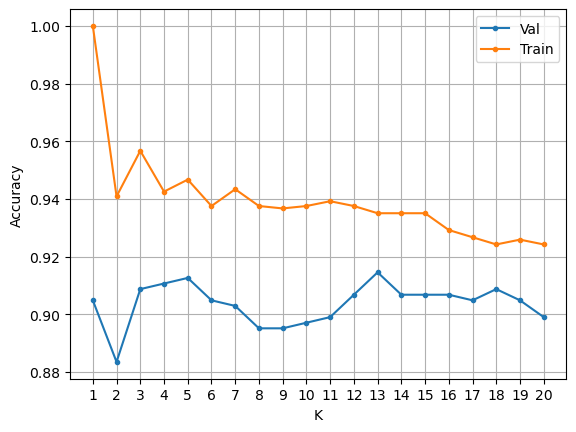

In [57]:
plt.plot(np.arange(1, 20+1, 1), acc_val_list, label='Val', marker='.')
plt.plot(np.arange(1, 20+1, 1), acc_train_list, label='Train', marker='.')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

### Repeated Holdout

In [58]:
nbr_holdout = 10
acc_val_list_all = list()
acc_train_list_all = list()
for i in range(nbr_holdout):

    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      test_size=0.3,
                                                      stratify=y_train_val,
                                                      random_state=i)

    acc_val_list = list()
    acc_train_list = list()
    for k in np.arange(1, 20+1, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train)
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train, y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [59]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

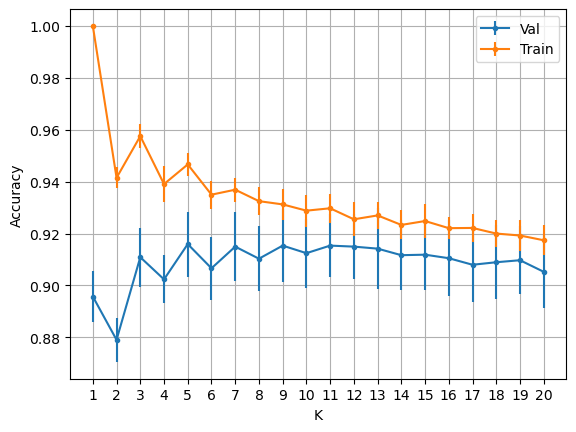

In [60]:
#Plotting Accuracy for different k after holdout with std
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_val_list_all, axis=0),
             yerr=np.std(acc_val_list_all, axis=0),
             label='Val', marker='.')

plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_train_list_all, axis=0),
             yerr=np.std(acc_train_list_all, axis=0),
             label='Train', marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.legend()
plt.show()

### Cross validation

In [61]:
acc_list_mean = list()
acc_list_std = list()
for k in np.arange(1, 20+1, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_val, y_train_val, cv=10)
    acc_list_mean.append(np.mean(scores))
    acc_list_std.append(np.std(scores))

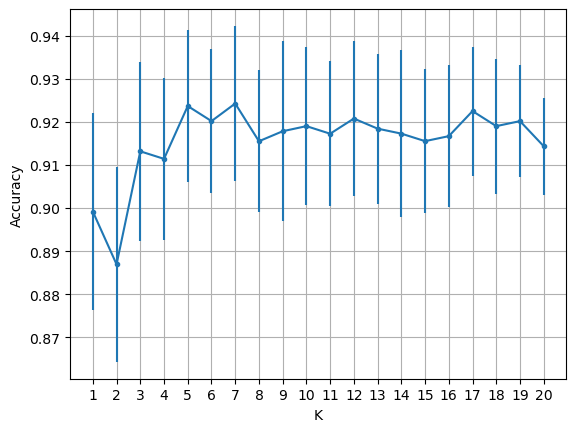

In [62]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=acc_list_mean,
             yerr=acc_list_std,
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.show()

In [63]:
#Making a for loop of cross validation for each k to reduce the error
nbr_repetitions = 5
acc_list_all = list()
for i in range(nbr_repetitions):
    acc_list = list()
    for k in np.arange(1, 21, 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train_val, y_train_val, cv=10, #k-fold
                                 scoring='accuracy')
        acc_list.append(scores)

    acc_list_all.append(acc_list)

In [64]:
acc_list_all = np.array(acc_list_all)

In [65]:
np.mean(acc_list_all.reshape(50, 20), axis=0)

array([0.91337209, 0.90813953, 0.92383721, 0.89534884, 0.90290698,
       0.9494186 , 0.93099415, 0.92339181, 0.90994152, 0.91461988,
       0.90174419, 0.90406977, 0.92209302, 0.89127907, 0.90639535,
       0.94244186, 0.92865497, 0.92222222, 0.91111111, 0.91111111])

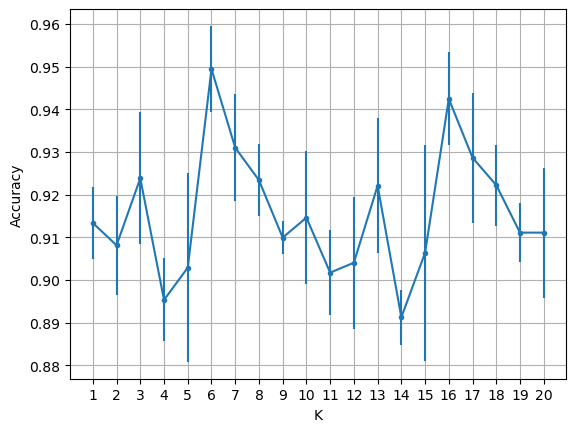

In [66]:
plt.errorbar(x=np.arange(1, 20+1, 1),
             y=np.mean(acc_list_all.reshape(50, 20), axis=0),
             yerr=np.std(acc_list_all.reshape(50, 20), axis=0),
             marker='.')

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 20+1, 1))
plt.grid()
plt.show()

### The final KNN model

We chosed k = 6 for the KNN after analysing the different values of accuracy and std and selecting the best combination

In [67]:
#The final value ok k selected
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_val, y_train_val)

y_pred = knn.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = knn.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

           F       0.94      0.89      0.91       385
           M       0.88      0.94      0.91       351

    accuracy                           0.91       736
   macro avg       0.91      0.91      0.91       736
weighted avg       0.92      0.91      0.91       736

              precision    recall  f1-score   support

           F       0.97      0.92      0.94       895
           M       0.91      0.97      0.94       821

    accuracy                           0.94      1716
   macro avg       0.94      0.94      0.94      1716
weighted avg       0.94      0.94      0.94      1716



### Simulating KNN with different volumes of test and validation set with respect to metrics

After plotting the different accuracy for different size of the selected dataset we can observe that that accuracy is directly proportional to data volume. The accuracy for each metric was comparable but for manhattan the Accuracy score for the validation set was relatively higher, for this reason we selected this metric.
If the volume of the dataset was bigger and not easly processable we could have chosen a portion of data, for example cutting for p=0.7, but in our case we decided to keep the entire dataset.

In [68]:
#Euclidean
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.1, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [69]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

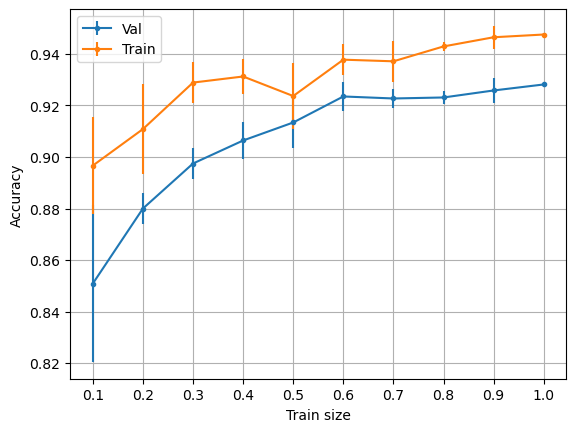

In [70]:
plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [71]:
#Manhattan
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.1, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [72]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

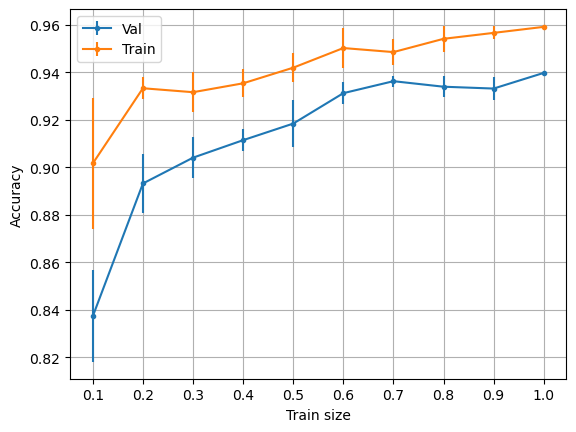

In [73]:
plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

In [74]:
#Cosine
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()
for p in np.arange(0.1, 1.1, 0.1):
    acc_val_list = list()
    acc_train_list = list()
    for i in range(nbr_repetitions):
        index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * p), replace=False)
        knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
        knn.fit(X_train[index], y_train[index])
        y_pred = knn.predict(X_val)
        y_pred_train = knn.predict(X_train[index])
        acc_val_list.append(accuracy_score(y_val, y_pred))
        acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

    acc_val_list_all.append(acc_val_list)
    acc_train_list_all.append(acc_train_list)

In [75]:
acc_val_list_all = np.array(acc_val_list_all)
acc_train_list_all = np.array(acc_train_list_all)

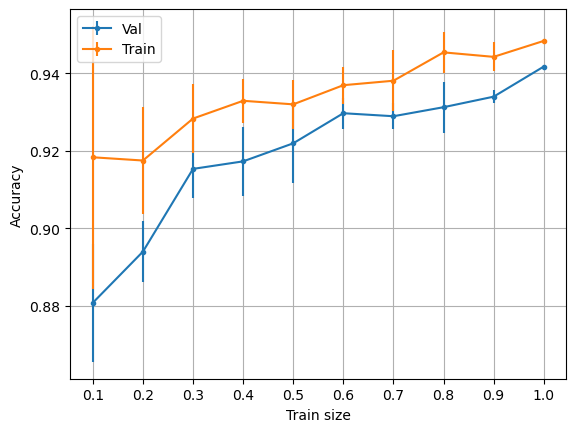

In [76]:
plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_val_list_all, axis=1),
             yerr=np.std(acc_val_list_all, axis=1),
             label='Val', marker='.')

plt.errorbar(x=np.arange(0.1, 1.1, 0.1),
             y=np.mean(acc_train_list_all, axis=1),
             yerr=np.std(acc_train_list_all, axis=1),
             label='Train', marker='.')

plt.xlabel('Train size')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0.1, 1.1, 0.1))
plt.grid()
plt.legend()
plt.show()

### Chosen Hyperparameters

p = 1, metric = cosine, neighbors = 6

In [77]:
nbr_repetitions = 5
acc_val_list_all = list()
acc_train_list_all = list()

for i in range(nbr_repetitions):
    acc_val_list = list()
    acc_train_list = list()
    index = np.random.choice(np.arange(len(X_train)), int(len(X_train) * 1), replace=False)
    knn_final = KNeighborsClassifier(n_neighbors=6, metric='cosine')
    knn_final.fit(X_train[index], y_train[index])
    y_pred = knn_final.predict(X_val)
    y_pred_train = knn_final.predict(X_train[index])
    acc_val_list.append(accuracy_score(y_val, y_pred))
    acc_train_list.append(accuracy_score(y_train[index], y_pred_train))

acc_val_list_all.append(acc_val_list)
acc_train_list_all.append(acc_train_list)

In [78]:
mean_acc_val = np.mean(acc_val_list_all)
std_acc_val = np.std(acc_val_list_all)
mean_acc_train = np.mean(acc_train_list_all)
std_acc_train = np.std(acc_train_list_all)

In [79]:
print(f"Media accuracy validazion: {mean_acc_val:.2f} ± {std_acc_val:.2f}")
print(f"Media accuracy train: {mean_acc_train:.2f} ± {std_acc_train:.2f}")

Media accuracy validazion: 0.93 ± 0.00
Media accuracy train: 0.93 ± 0.00


In [80]:
y_pred = knn_final.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = knn_final.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

           F       0.94      0.88      0.91       385
           M       0.88      0.94      0.91       351

    accuracy                           0.91       736
   macro avg       0.91      0.91      0.91       736
weighted avg       0.91      0.91      0.91       736

              precision    recall  f1-score   support

           F       0.97      0.90      0.93       901
           M       0.90      0.96      0.93       815

    accuracy                           0.93      1716
   macro avg       0.93      0.93      0.93      1716
weighted avg       0.93      0.93      0.93      1716



In [81]:
cm = confusion_matrix(y_test, y_pred)


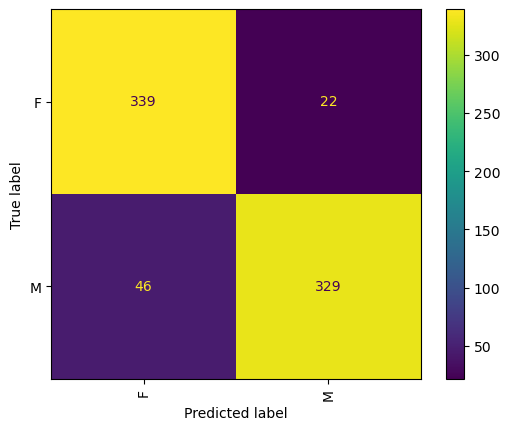

In [82]:
disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

# Decision Tree

### Choosing best parameters

In [83]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0,
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)
accuracy_score(y_val, y_pred)

0.8757281553398059

In [84]:
param_dict = {
    'max_depth': np.arange(1, 20+1, 1).tolist() + [None],
    'min_samples_split': np.arange(2, 50+1, 1),
    'min_samples_leaf': np.arange(1, 30+1, 1),
    'ccp_alpha': np.arange(0.0, 0.1, 0.01)
}

In [85]:
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    random_state=0
)
rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=100)
rands.fit(X_train_val, y_train_val)

clf = rands.best_estimator_

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8532608695652174

In [86]:
rands.best_params_

{'min_samples_split': 43,
 'min_samples_leaf': 4,
 'max_depth': 13,
 'ccp_alpha': 0.0}

In [87]:
clf = rands.best_estimator_

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8532608695652174

## Best parameter found are: Gini, max_depth=13, min_samples_leaf=4, min_samples_split=43, random_state=0 

In [112]:
clf_final = DecisionTreeClassifier(
    criterion='gini',
    max_depth=13,
    min_samples_split=43,
    min_samples_leaf=4,
    ccp_alpha=0.0,
    random_state=0
)

In [113]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, min_samples_leaf=4, min_samples_split=43,
                       random_state=0)

In [114]:
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)

In [115]:
accuracy_score(y_test, y_pred)

0.9320652173913043

In [116]:
accuracy_score(y_train, y_pred_train)

0.958368026644463

In [117]:
clf_final.classes_

array(['F', 'M'], dtype=object)

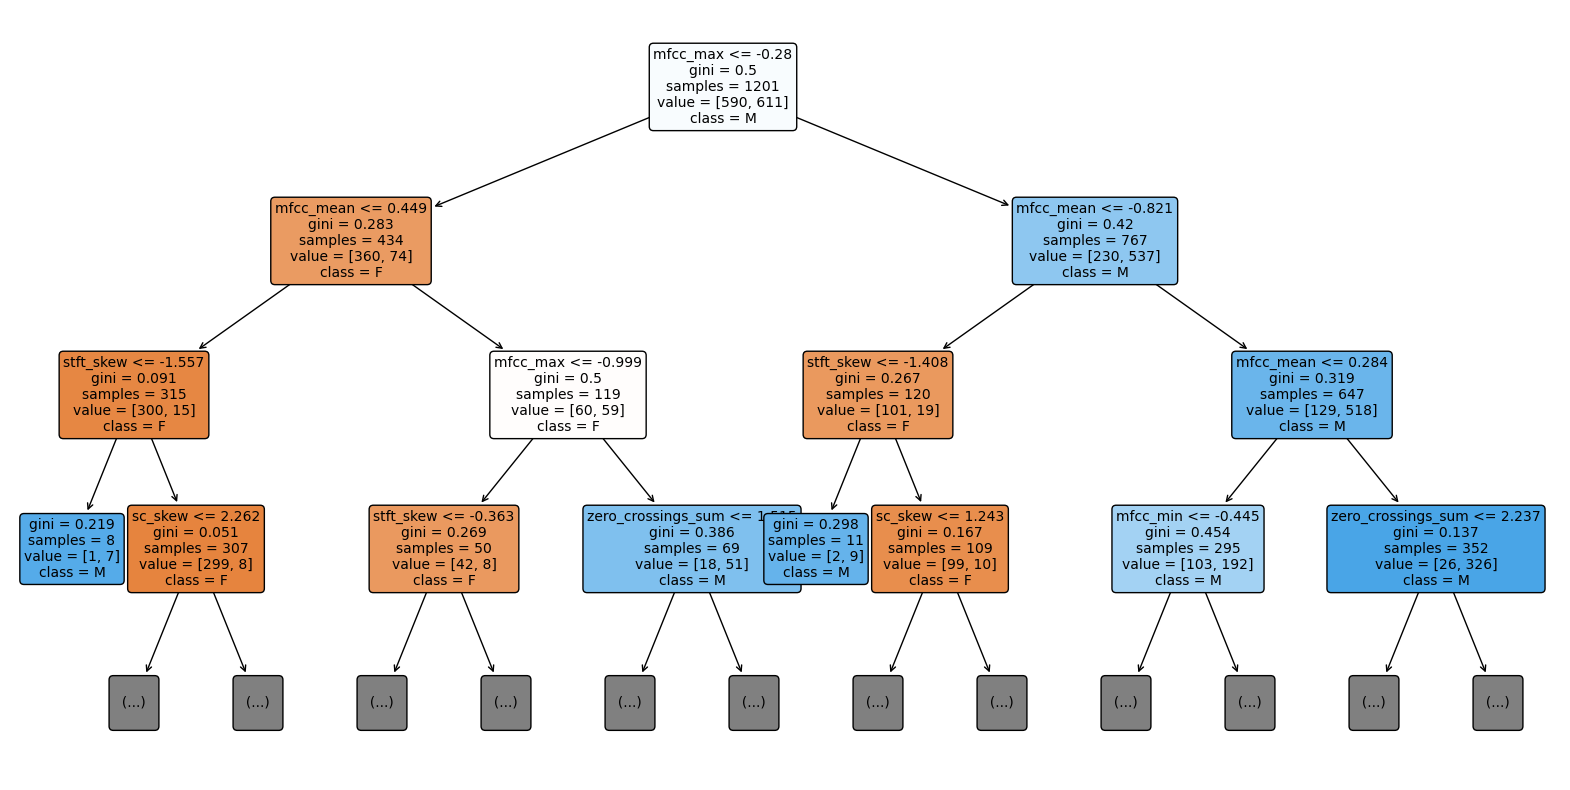

In [118]:
plt.figure(figsize=(20, 10))
plot_tree(clf_final,
          feature_names=dfnaf.columns,
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=3
          )
plt.show()

In [119]:
columns = ['vocal_channel', 'emotional_intensity', 'repetition',
       'length_ms', 'intensity', 'zero_crossings_sum',
       'mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max', 'sc_mean', 'sc_std',
       'sc_min', 'sc_max', 'sc_kur', 'sc_skew', 'stft_kur', 'stft_skew', 'max',
       'kur', 'skew']

In [121]:
clf_final.feature_importances_

array([0.00525869, 0.        , 0.        , 0.        , 0.01209274,
       0.06463502, 0.30174327, 0.00264289, 0.07464418, 0.35695589,
       0.00171253, 0.04537867, 0.01566663, 0.        , 0.00403592,
       0.02630972, 0.03152286, 0.05145728, 0.        , 0.00283889,
       0.00310483])

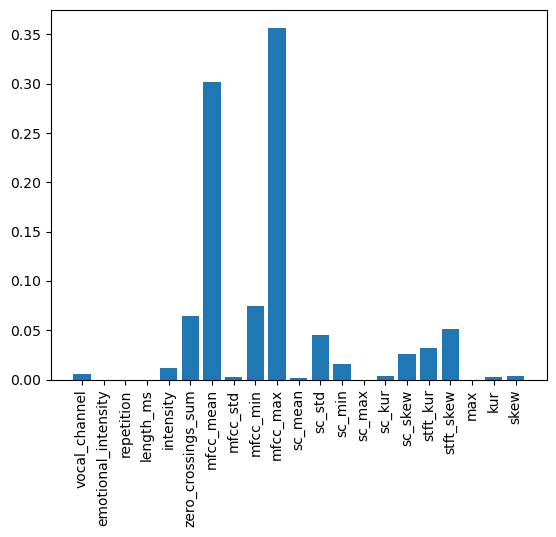

In [122]:
plt.bar(columns, clf_final.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [123]:
y_pred = clf_final.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = clf_final.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

           F       0.88      0.85      0.87       372
           M       0.86      0.88      0.87       364

    accuracy                           0.87       736
   macro avg       0.87      0.87      0.87       736
weighted avg       0.87      0.87      0.87       736

              precision    recall  f1-score   support

           F       0.93      0.92      0.92       852
           M       0.92      0.93      0.92       864

    accuracy                           0.92      1716
   macro avg       0.92      0.92      0.92      1716
weighted avg       0.92      0.92      0.92      1716



In [124]:
cm = confusion_matrix(y_test, y_pred)

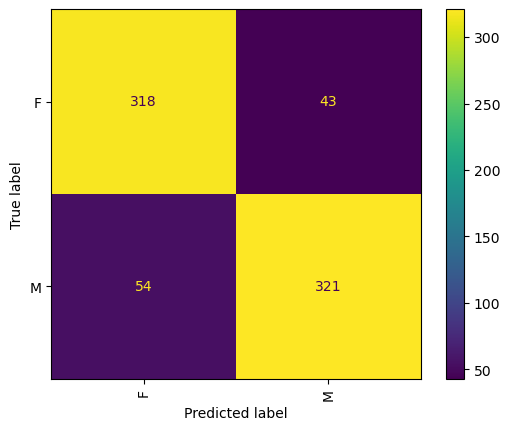

In [125]:
disp = ConfusionMatrixDisplay(cm, display_labels=clf_final.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

In [126]:
y_pred_proba = clf_final.predict_proba(X_test)

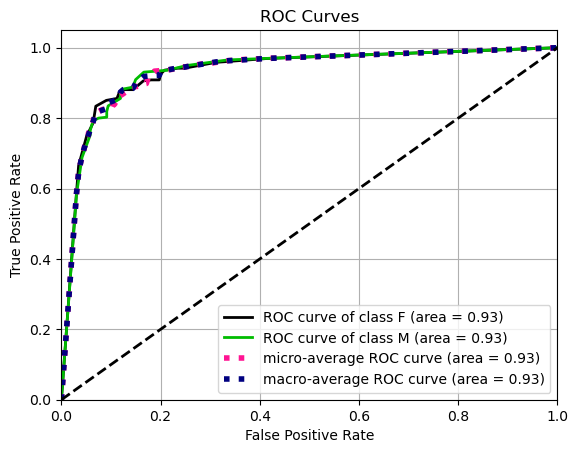

In [127]:
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.grid()
plt.show()

#### We can see we have an avg area of 0.93, considering 1 is the ideal area we can say this is a very good result

# Random Forest

In [137]:
clf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    ccp_alpha=0.0,
    max_features='sqrt',
    random_state=0
)

rands = RandomizedSearchCV(clf, param_dict, cv=5, scoring='accuracy', refit=True, n_iter=100)
rands.fit(X_train_val, y_train_val)
clf = rands.best_estimator_
clf

RandomForestClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=14,
                       n_estimators=20, random_state=0)

### Best parameters found: Gini, max_depth=20, min_samples_leaf=7, min_samples_split=14, n_estimators=20, random_state=0

In [138]:
clf = RandomForestClassifier(
    n_estimators=20,
    criterion='gini',
    max_depth=20,
    min_samples_split=14,
    min_samples_leaf=7,
    ccp_alpha=0.0,
    max_features='sqrt',
    random_state=0
)

clf.fit(X_train_val, y_train_val)

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.938858695652174

In [139]:
clf

RandomForestClassifier(max_depth=20, min_samples_leaf=7, min_samples_split=14,
                       n_estimators=20, random_state=0)

In [140]:
clf.feature_importances_

array([0.0181328 , 0.00209946, 0.00027724, 0.03399603, 0.01570972,
       0.08104761, 0.20386453, 0.01952483, 0.0231404 , 0.24650601,
       0.03433367, 0.02215612, 0.06346893, 0.01123211, 0.01610524,
       0.02791066, 0.04801515, 0.0923454 , 0.01100081, 0.01711909,
       0.0120142 ])

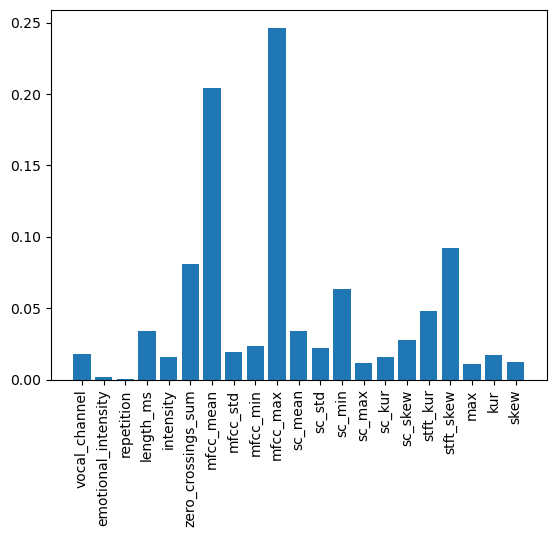

In [141]:
plt.bar(columns, clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [142]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test)) # on test set

y_pred_trainval = clf.predict(X_train_val)
print(classification_report(y_pred_trainval, y_train_val)) # on training set

              precision    recall  f1-score   support

           F       0.94      0.94      0.94       360
           M       0.94      0.94      0.94       376

    accuracy                           0.94       736
   macro avg       0.94      0.94      0.94       736
weighted avg       0.94      0.94      0.94       736

              precision    recall  f1-score   support

           F       0.97      0.98      0.98       833
           M       0.98      0.97      0.98       883

    accuracy                           0.98      1716
   macro avg       0.98      0.98      0.98      1716
weighted avg       0.98      0.98      0.98      1716



In [143]:
cm = confusion_matrix(y_test, y_pred)

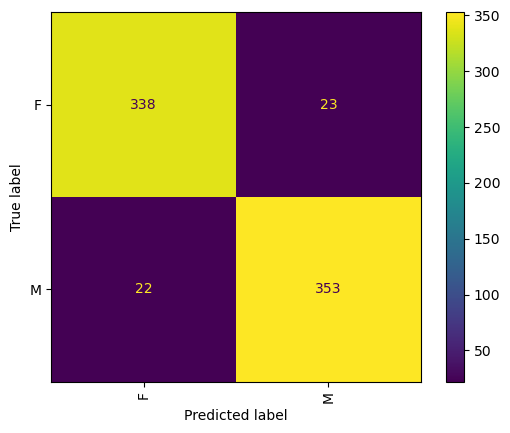

In [144]:
disp = ConfusionMatrixDisplay(cm, display_labels=clf_final.classes_)
disp.plot()
plt.xticks(rotation=90)
plt.show()

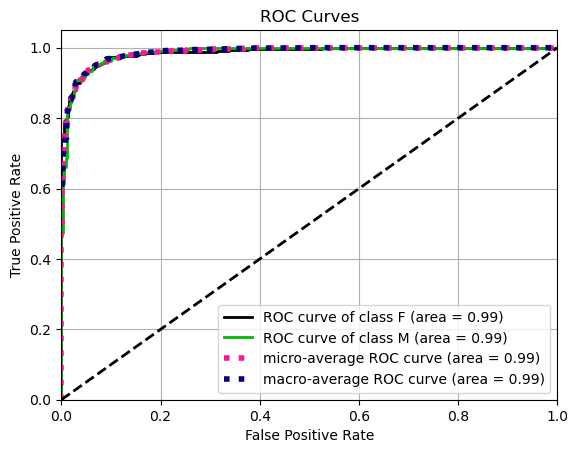

In [145]:
y_pred_proba = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.grid()
plt.show()